### **Support vector classifier implemention**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
   
)


In [3]:
X

array([[-0.99122002, -0.51632488],
       [ 1.67605147,  1.40244725],
       [-1.78739057,  1.68851384],
       ...,
       [-0.87720268, -2.31360109],
       [-0.95328825, -0.64098829],
       [-0.9431842 , -1.644244  ]], shape=(1000, 2))

<Axes: xlabel='0', ylabel='1'>

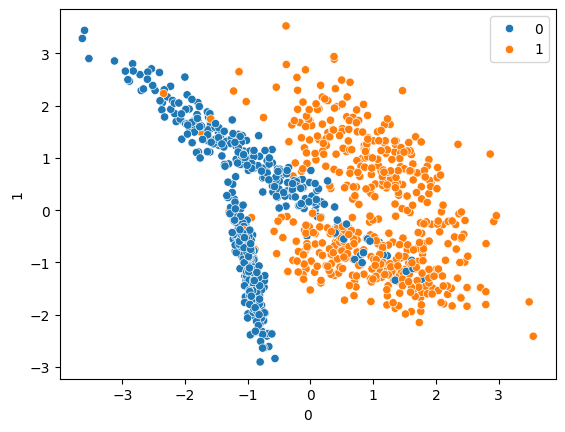

In [4]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [5]:
# Train to split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
# Check the distribution
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [7]:
# Train the models
from sklearn.svm import SVC
model=SVC(kernel='linear')

model.fit(X_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [8]:
# Make the pridiction
y_pred=model.predict(X_test)

In [9]:
# Evaluation metrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('classification_report \n',classification_report(y_test,y_pred))
print('confusion_matrix \n',confusion_matrix(y_test,y_pred))
print('accuracy_score \n',accuracy_score(y_test,y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        88
           1       0.90      0.92      0.91       112

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

confusion_matrix 
 [[ 77  11]
 [  9 103]]
accuracy_score 
 0.9


Check for different svm kernal Used the hyperparameter tuning with svm

In [10]:
# Defining parameter range
model=SVC()
c_value=[0.1,1,10,100,1000]
gamma=[1,0.1,0.01,0.001,0.0001]
kernal=['linear', 'poly', 'rbf', 'sigmoid']

param={
    'C':c_value,
    'gamma':gamma,
    'kernel':kernal
}

In [11]:
# import library
from sklearn.model_selection import GridSearchCV
Hypermodel=GridSearchCV(estimator=model,param_grid=param,cv=5,verbose=3,refit=True)

In [12]:
# Train the models
Hypermodel.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.894 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.919 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.869 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.894 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.894 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.863 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.887 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [13]:
# Print what we found
print(f'The best param is {Hypermodel.best_params_}')
print('='*100)
print(f'The best score is {Hypermodel.best_score_}')

The best param is {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
The best score is 0.95375


In [15]:
# Predict the reuslt
y_hyper_pred=Hypermodel.predict(X_test)
# Performance metrix
print('classification_report',classification_report(y_test,y_hyper_pred))
print('confusion_matrix',confusion_matrix(y_test,y_hyper_pred))
print('accuracy_score',accuracy_score(y_test,y_hyper_pred))

classification_report               precision    recall  f1-score   support

           0       0.95      0.94      0.95        88
           1       0.96      0.96      0.96       112

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

confusion_matrix [[ 83   5]
 [  4 108]]
accuracy_score 0.955
